In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from geo_transform.tps import ThinPlateSpline as tps

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [3]:
x = tf.keras.applications.ResNet101()

179650560/179648224 [==============================] - 151s 1us/step


In [16]:
img_name = "annotation.png"
#img_name = "original.png"

In [17]:
img = cv2.imread(img_name)[:,:,::-1]
img = cv2.resize(img, (32, 32) ,interpolation=cv2.INTER_AREA)

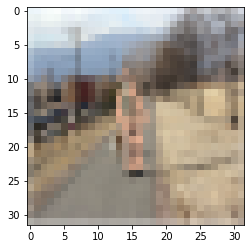

In [18]:
plt.imshow(img)

In [ ]:
img.shape

In [48]:
p = np.array([
  [-0.5, -0.5],
  [0.5, -0.5],
  [-0.5, 0.5],
  [0.5, 0.5]])

v = np.array([
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0]])

p = tf.constant(p.reshape([1, 4, 2]), dtype=tf.float32)
v = tf.constant(v.reshape([1, 4, 2]), dtype=tf.float32)
#t_img = tf.constant(img.reshape(shape), dtype=tf.float32)
img = np.reshape(img, (1, 32, 32, 3))
T_g, x_s, y_s, x_s_flat, y_s_flat = tps(img, p, -v, (32, 32))


In [49]:
x_s

<tf.Tensor: id=616, shape=(1, 1, 1024), dtype=float32, numpy=
array([[[-1.        , -0.9354839 , -0.87096775, ...,  0.8709675 ,
          0.9354837 ,  0.9999999 ]]], dtype=float32)>

In [50]:
y_s

<tf.Tensor: id=619, shape=(1, 1, 1024), dtype=float32, numpy=
array([[[-1.       , -1.       , -1.       , ...,  0.9999999,
          0.9999999,  0.9999998]]], dtype=float32)>

In [51]:
x_s_flat

<tf.Tensor: id=621, shape=(1024,), dtype=float32, numpy=
array([-1.        , -0.9354839 , -0.87096775, ...,  0.8709675 ,
        0.9354837 ,  0.9999999 ], dtype=float32)>

In [52]:
y_s_flat

<tf.Tensor: id=623, shape=(1024,), dtype=float32, numpy=
array([-1.       , -1.       , -1.       , ...,  0.9999999,  0.9999999,
        0.9999998], dtype=float32)>

In [53]:
x_s_flat = np.reshape(x_s_flat, (32, 32))+1
y_s_flat = np.reshape(y_s_flat, (32, 32))+1

In [54]:
x_s_flat[:5,:5]

array([[0.        , 0.06451613, 0.12903225, 0.19354838, 0.2580645 ],
       [0.        , 0.06451613, 0.12903225, 0.19354838, 0.2580645 ],
       [0.        , 0.06451613, 0.12903225, 0.19354838, 0.2580645 ],
       [0.        , 0.06451613, 0.12903225, 0.19354838, 0.2580645 ],
       [0.        , 0.06451613, 0.12903225, 0.19354838, 0.2580645 ]],
      dtype=float32)

In [55]:
y_s_flat[:5,:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.06451613, 0.06451613, 0.06451613, 0.06451613, 0.06451613],
       [0.12903225, 0.12903225, 0.12903225, 0.12903225, 0.12903225],
       [0.19354838, 0.19354838, 0.19354838, 0.19354838, 0.19354838],
       [0.2580645 , 0.2580645 , 0.2580645 , 0.2580645 , 0.2580645 ]],
      dtype=float32)

In [56]:
img.shape

(1, 32, 32, 3)

In [57]:
t_img = cv2.remap(img[0], x_s_flat, y_s_flat, cv2.INTER_CUBIC)

In [58]:
t_img.shape

(32, 32, 3)

In [59]:
img

array([[[[236, 245, 249],
         [238, 246, 251],
         [244, 250, 251],
         ...,
         [168, 168, 171],
         [188, 189, 195],
         [210, 214, 223]],

        [[236, 243, 243],
         [233, 241, 241],
         [241, 247, 246],
         ...,
         [149, 151, 157],
         [167, 171, 180],
         [173, 177, 184]],

        [[228, 235, 239],
         [226, 234, 237],
         [232, 238, 239],
         ...,
         [135, 134, 135],
         [156, 156, 162],
         [157, 153, 154]],

        ...,

        [[159, 147, 135],
         [126, 114, 102],
         [121, 115, 108],
         ...,
         [175, 155, 131],
         [162, 138, 116],
         [172, 152, 129]],

        [[139, 130, 122],
         [124, 118, 111],
         [134, 128, 120],
         ...,
         [187, 168, 143],
         [144, 123, 105],
         [172, 154, 134]],

        [[176, 174, 168],
         [166, 162, 157],
         [170, 166, 160],
         ...,
         [208, 192, 172],
        

In [61]:
t_img.shape

(32, 32, 3)

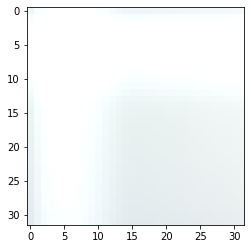

In [60]:
plt.imshow(t_img)

In [ ]:
t_img.shape

In [ ]:
t_img[0].numpy().min()